# **Prediction using Unsupervised Machine Learning**

**Importing the libraries required**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Importing the Data**

In [27]:
data = pd.read_csv(r"/content/grip-2.csv")

In [28]:
data.head()  # first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
data.tail() # last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [30]:
data.drop(columns = "Id",inplace = True) # Removing the Id column

In [31]:
data.shape # no of rows nd columns

(150, 5)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [34]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Finding the optimum number of clusters for K-Means classification**

In [35]:
x=data.iloc[:, [0,1,2,3]].values

In [36]:
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,n_init=10, max_iter=300, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

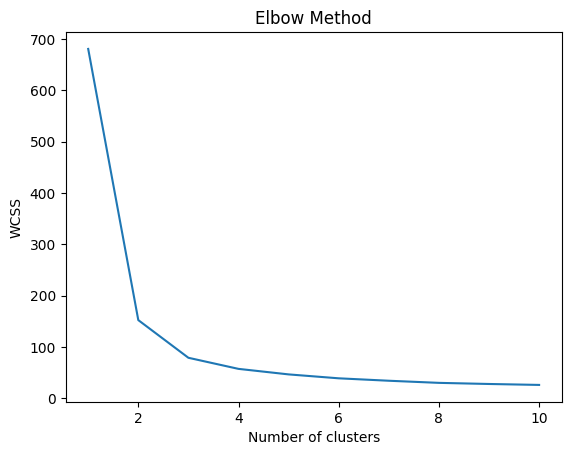

In [37]:
# optimum number of clusters would be obtained at the elbow point
# Let's plot a Line graph of the results obtained and Look for the elbow point

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


The plot above illustrates the Elbow Method for determining the optimal number of clusters in K-means clustering. The elbow point, where the within cluster sum of squares (WCSS) no longer decreases significantly with the addition of more clusters, indicates the ideal number of clusters. In this case, the elbow point is observed at 3 clusters.Therefore, we select 3 as the optimal number of clusters for our analysis.


In [38]:
# Creating Kmeans classifier

kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0)
y=kmeans.fit_predict(x) # y represents the cluster Label

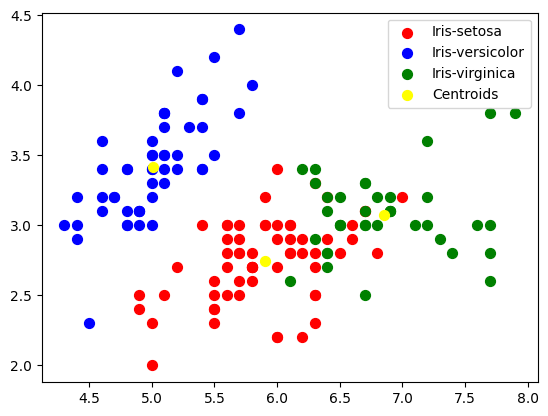

In [39]:
# Visualising the clusters and centroids on the first two columns

plt.scatter(x[y==0,0], x[y==0,1], c="red", s=50, label="Iris-setosa")
plt.scatter(x[y==1,0], x[y==1,1], c="blue", s=50, label="Iris-versicolor")
plt.scatter(x[y==2,0], x[y==2,1], c="green", s=50, label="Iris-virginica")

# plotting the centroids of the cluster

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="yellow", s=50, label="Centroids")
plt.legend()

After determining the optimal number of clusters, I visualized the clusters using a scatter plot. Each data point represents an ins flower, colored according to its assigned cluster, with centroids indicating the cluster centers
